## **Clustering tahap 1**
### Nabil Azzumar Labib
### 1301194076

In [ ]:
# Library
import pandas as pd
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# **Read data & eksplorasi data**

In [ ]:
# baca data
dfTrain = pd.read_csv('https://raw.githubusercontent.com/NabilAzzumar/Clustering_ML1/main/kendaraan_train.csv')

In [ ]:
# melihat 5 data awal pada data train
dfTrain.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


In [ ]:
# melihat keseluruhan jumlah baris dan kolom
dfTrain.shape

(285831, 12)

In [ ]:
# melihat info pada data
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Jenis_Kelamin      271391 non-null  object 
 2   Umur               271617 non-null  float64
 3   SIM                271427 non-null  float64
 4   Kode_Daerah        271525 non-null  float64
 5   Sudah_Asuransi     271602 non-null  float64
 6   Umur_Kendaraan     271556 non-null  object 
 7   Kendaraan_Rusak    271643 non-null  object 
 8   Premi              271262 non-null  float64
 9   Kanal_Penjualan    271532 non-null  float64
 10  Lama_Berlangganan  271839 non-null  float64
 11  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 26.2+ MB


In [ ]:
# melihat count, mean, std, dan lainnya pada data
dfTrain.describe()

,id,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,285831.000000,271617.000000,271427.000000,271525.000000,271602.000000,271262.000000,271532.000000,271839.000000,285831.000000
mean,142916.000000,38.844336,0.997848,26.405410,0.458778,30536.683472,112.021567,154.286302,0.122471
std,82512.446734,15.522487,0.046335,13.252714,0.498299,17155.000770,54.202457,83.694910,0.327830
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,71458.500000,25.000000,1.000000,15.000000,0.000000,24398.000000,29.000000,82.000000,0.000000
50%,142916.000000,36.000000,1.000000,28.000000,0.000000,31646.000000,132.000000,154.000000,0.000000
75%,214373.500000,49.000000,1.000000,35.000000,1.000000,39377.750000,152.000000,227.000000,0.000000
max,285831.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [ ]:
# melihat korelasi antar data
dfTrain.corr()

,id,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
id,1.000000,0.001729,-0.002658,0.002114,-0.003043,0.002292,-0.001500,0.000913,0.000972
Umur,0.001729,1.000000,-0.079467,0.043603,-0.255006,0.064634,-0.577722,0.000147,0.109888
SIM,-0.002658,-0.079467,1.000000,-0.003359,0.016073,-0.011315,0.043426,-0.001266,0.009588
Kode_Daerah,0.002114,0.043603,-0.003359,1.000000,-0.024533,-0.011887,-0.043216,-0.003639,0.010186
Sudah_Asuransi,-0.003043,-0.255006,0.016073,-0.024533,1.000000,0.005903,0.221767,0.002757,-0.340917
Premi,0.002292,0.064634,-0.011315,-0.011887,0.005903,1.000000,-0.112187,-0.000750,0.023770
Kanal_Penjualan,-0.001500,-0.577722,0.043426,-0.043216,0.221767,-0.112187,1.000000,0.000327,-0.140931
Lama_Berlangganan,0.000913,0.000147,-0.001266,-0.003639,0.002757,-0.000750,0.000327,1.000000,-0.002225
Tertarik,0.000972,0.109888,0.009588,0.010186,-0.340917,0.023770,-0.140931,-0.002225,1.000000


# **Preprocessing**

In [ ]:
# menghitung dan melihat jumlah baris yang valuenya null pada setiap kolom
dfTrain.isnull().sum()

id                       0
Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

In [ ]:
# melakukan drop pada data/value yang bernilai null
dfTrain.dropna(inplace = True, axis = 0)
dfTrain.isnull().sum()

id                   0
Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

In [ ]:
# melakukan drop pada kategori " id, Tertarik"
dfTrain.drop('id',axis=1,inplace=True)
dfTrain.drop('Tertarik',axis=1,inplace=True)

In [ ]:
# melihat tampilan data setelah id dan Tertarik di drop
dfTrain.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0
1,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0
3,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0
5,Pria,21.0,1.0,35.0,1.0,< 1 Tahun,Tidak,22735.0,152.0,171.0
8,Wanita,20.0,1.0,8.0,1.0,< 1 Tahun,Tidak,30786.0,160.0,31.0


In [ ]:
# mengubah data kategori menjadi numerical

# mengubah format Jenis_Kelamin dari [Pria, Wanita] menjadi [1 = Pria, 0 = Wanita]
dfTrain["Jenis_Kelamin"] = dfTrain["Jenis_Kelamin"].replace(["Pria", "Wanita"], [1,0])

# mengubah format Umur_Kendaraan dari [< 1 Tahun", "> 2 Tahun", "1-2 Tahun] menjadi [1, 2, 1.5]
dfTrain["Umur_Kendaraan"] = dfTrain["Umur_Kendaraan"].replace(["< 1 Tahun", "> 2 Tahun", "1-2 Tahun"], [1,2,1.5])

# mengubah format Kendaraan_Rusak dari [Pernah, Tidak] menjadi [1 = pernah, 0 = tidak]
dfTrain["Kendaraan_Rusak"] = dfTrain["Kendaraan_Rusak"].replace(["Pernah", "Tidak"], [1,0])

dfTrain.head(12)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,0,30.0,1.0,33.0,1.0,1.0,0,28029.0,152.0,97.0
1,1,48.0,1.0,39.0,0.0,2.0,1,25800.0,29.0,158.0
3,0,58.0,1.0,48.0,0.0,1.5,0,2630.0,124.0,63.0
5,1,21.0,1.0,35.0,1.0,1.0,0,22735.0,152.0,171.0
8,0,20.0,1.0,8.0,1.0,1.0,0,30786.0,160.0,31.0
10,1,25.0,1.0,14.0,1.0,1.0,0,34212.0,152.0,282.0
14,1,66.0,1.0,24.0,1.0,1.5,0,38616.0,145.0,281.0
15,1,31.0,1.0,8.0,0.0,1.0,1,2630.0,152.0,132.0
16,0,24.0,1.0,30.0,1.0,1.0,0,27285.0,152.0,215.0
17,0,22.0,1.0,15.0,0.0,1.0,1,38289.0,152.0,225.0


In [ ]:
# melakukan export data 
from google.colab import files
dfTrain.to_csv("data_train_jadi.csv")
files.download("data_train_jadi.csv")

In [ ]:
# melakukan scalling supaya data dalam jangkauan yang sama
scaler = MinMaxScaler()
dfTrain = pd.DataFrame(scaler.fit_transform(dfTrain), columns=dfTrain.columns)
dfTrain

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,0.0,0.153846,1.0,0.634615,1.0,0.0,0.0,0.047251,0.932099,0.301038
1,1.0,0.430769,1.0,0.750000,0.0,1.0,1.0,0.043104,0.172840,0.512111
2,0.0,0.584615,1.0,0.923077,0.0,0.5,0.0,0.000000,0.759259,0.183391
3,1.0,0.015385,1.0,0.673077,1.0,0.0,0.0,0.037402,0.932099,0.557093
4,0.0,0.000000,1.0,0.153846,1.0,0.0,0.0,0.052380,0.981481,0.072664
...,...,...,...,...,...,...,...,...,...,...
171063,0.0,0.046154,1.0,0.076923,1.0,0.0,0.0,0.043454,0.932099,0.716263
171064,0.0,0.015385,1.0,0.884615,1.0,0.0,0.0,0.078239,0.932099,0.138408
171065,0.0,0.046154,1.0,0.961538,1.0,0.0,0.0,0.087661,0.932099,0.747405
171066,1.0,0.738462,1.0,0.134615,1.0,0.5,0.0,0.051853,0.759259,0.899654


                   Jenis_Kelamin      Umur  ...  Kanal_Penjualan  Lama_Berlangganan
Jenis_Kelamin           1.000000  0.145438  ...        -0.114058          -0.002175
Umur                    0.145438  1.000000  ...        -0.576009          -0.001032
SIM                    -0.018742 -0.078543  ...         0.041575           0.001739
Kode_Daerah             0.002656  0.044256  ...        -0.043988          -0.003798
Sudah_Asuransi         -0.082809 -0.256815  ...         0.221583           0.002902
Umur_Kendaraan          0.160203  0.766604  ...        -0.549524          -0.002030
Kendaraan_Rusak         0.092064  0.269755  ...        -0.226667          -0.002023
Premi                   0.003023  0.063838  ...        -0.112297          -0.001260
Kanal_Penjualan        -0.114058 -0.576009  ...         1.000000           0.000878
Lama_Berlangganan      -0.002175 -0.001032  ...         0.000878           1.000000

[10 rows x 10 columns]


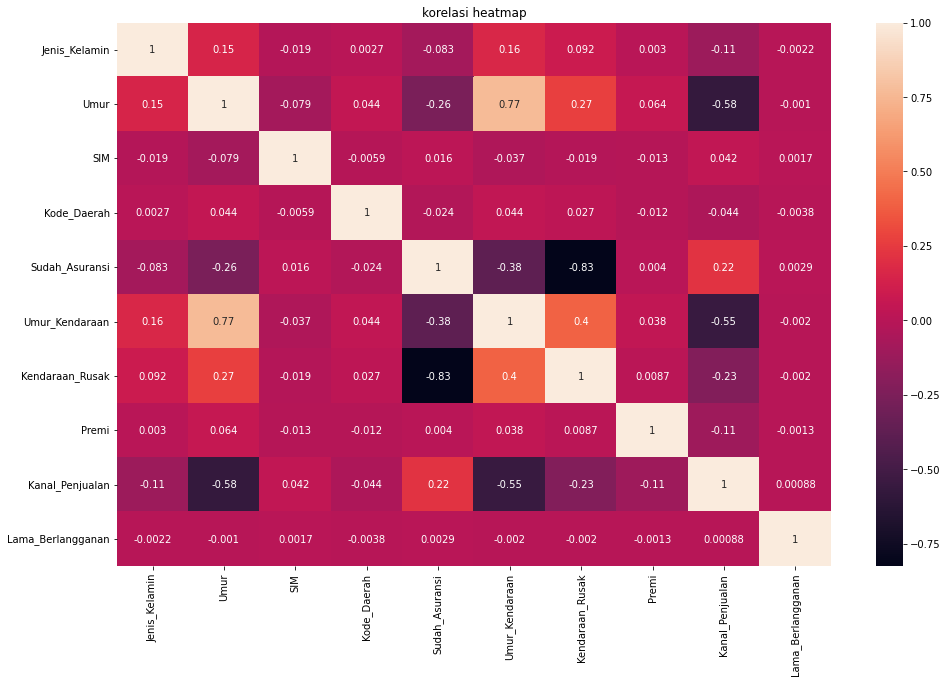

In [ ]:
# mengecek korelasi dengan menggunakan heatmapp
corr = dfTrain.corr()
print(corr)
plt.figure(figsize=(16, 10))
sns.heatmap(dfTrain.corr(), annot = True)
plt.title("korelasi heatmap",y=1.1)
plt.show()

In [ ]:
# setelah melihat dari korelasi heatmap disini dapat diambil kategori[umur, kanal_penjualan]
m = dfTrain.iloc[:, [1,8]].values
m

array([[0.15384615, 0.93209877],
       [0.43076923, 0.17283951],
       [0.58461538, 0.75925926],
       ...,
       [0.04615385, 0.93209877],
       [0.73846154, 0.75925926],
       [0.38461538, 0.15432099]])

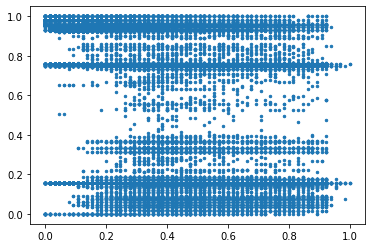

In [ ]:
# penggambaran persebaran data menggunakan scatterplot
plt.scatter(m[:,0],m[:,1], s=6)

# **Pemodelan**

In [ ]:
# mengitung jarak menggunakan rumus euclidean distance
def euclidean_distance(m1,m2):
    return (sum((m1 - m2)**2)**0.5)

In [ ]:
# mengelompokkan data ke dalam cluster
def clustering(centroids, m):
    clusters = []
    for i in range(len(m)):
        jarak = []
        for centroid in centroids:
            jarak.append(euclidean_distance(centroid, m[i]))
        jarak_terpendek = [z for z, val in enumerate(jarak) if val==min(jarak)]
        clusters.append(jarak_terpendek[0])
    return np.array(clusters)

In [ ]:
# membuat centroid baru
def bangun_centroid(clusters, m):
    centroid_new = []
    df_clusters_m = pd.concat([pd.DataFrame(m),pd.DataFrame(clusters, columns=['cluster'])], axis=1)
    for c in set(df_clusters_m['cluster']):
        df_current_cluster = df_clusters_m[df_clusters_m['cluster']==c][df_clusters_m.columns[:-1]]
        ratarata_cluster = df_current_cluster.mean(axis=0)
        centroid_new.append(ratarata_cluster)
    return np.array(centroid_new)

In [ ]:
df_clusters_m

,0,1,cluster
0,0.153846,0.932099,3
1,0.430769,0.172840,1
2,0.584615,0.759259,2
3,0.015385,0.932099,3
4,0.000000,0.981481,3
...,...,...,...
171063,0.046154,0.932099,3
171064,0.015385,0.932099,3
171065,0.046154,0.932099,3
171066,0.738462,0.759259,2


In [ ]:
# mencari varian yang ada pada cluster untuk melihat baik tidaknya clustering
def varians_cluster_train(clusters, m):
    varians_train = []
    df_clusters_m = pd.concat([pd.DataFrame(m),pd.DataFrame(clusters, columns=['cluster'])], axis=1)
    for c in set(df_clusters_m['cluster']):
        df_current_cluster = df_clusters_m[df_clusters_m['cluster'] ==c][df_clusters_m.columns[:-1]]
        ratarata_cluster = df_current_cluster.mean(axis=0)
        mean_repmat = np.matlib.repmat(ratarata_cluster, df_current_cluster.shape[0],1)
        varians_train .append(np.sum(np.sum((df_current_cluster - mean_repmat)**2)))
    return np.array(varians_train)

In [ ]:
def elbow_method(WCSS, k):
    plt.plot(range(1,k+1),WCSS)
    plt.title('Elbow Method')
    plt.xlabel("#Jumlah Cluster#")
    plt.ylabel("WCSS")
    plt.show()

### **Kmeans**

Varians cluster pertama 2639 pada K: 1
Varians saat percobaan clustering Ke- 1 1810
Varians saat percobaan clustering Ke- 2 1010
WCSS Cluster dengan K = 1 : 2821 

Varians cluster pertama 1010 pada K: 2
Varians saat percobaan clustering Ke- 1 866
Varians saat percobaan clustering Ke- 2 763
WCSS Cluster dengan K = 2 : 1628 

Varians cluster pertama 763 pada K: 3
Varians saat percobaan clustering Ke- 1 696
Varians saat percobaan clustering Ke- 2 685
WCSS Cluster dengan K = 3 : 1382 

Varians cluster pertama 685 pada K: 4
Varians saat percobaan clustering Ke- 1 683
Varians saat percobaan clustering Ke- 2 683
WCSS Cluster dengan K = 4 : 1366 



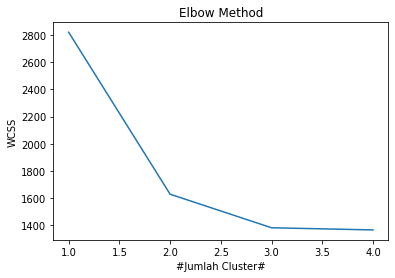

CPU times: user 51.7 s, sys: 122 ms, total: 51.8 s
Wall time: 51.9 s


In [ ]:
# Kmeans dengan k = 4
%%time
k = 4
WCSS = []
centroid_pertama = np.random.choice(len(m), k, replace=False)
centroids = m[centroid_pertama, :]

for i in range (1,k+1):
    variansClusterTrain = []
    clusters = clustering(centroids, m)
    print("Varians cluster pertama", round(np.mean(varians_cluster_train(clusters, m))), "pada K:",i )
    
    for j in range(2):
        centroids = bangun_centroid(clusters,m)
        clusters = clustering(centroids, m)
        cluster_var = np.mean(varians_cluster_train(clusters, m))
        variansClusterTrain.append(cluster_var)
        print("Varians saat percobaan clustering Ke-",j+1, round(cluster_var))
    WCSS.append(np.sum(variansClusterTrain))
    print("WCSS Cluster dengan K =",i,":",round(WCSS[i-1]),"\n")

elbow_method(WCSS,k)

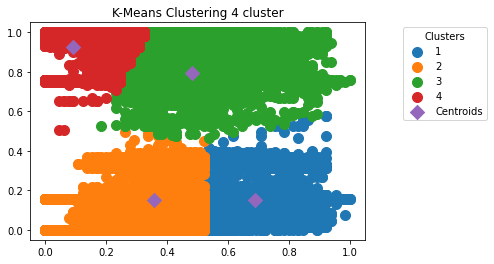

In [ ]:
# Visualisasi K-Means
df_clusters_m = pd.concat([pd.DataFrame(m),pd.DataFrame(clusters, columns=['cluster'])], axis=1)
label = df_clusters_m['cluster']
u_labels = np.unique(label)
for i in range(len(u_labels)):
    plt.scatter(m[label == i , 0] , m[label == i , 1] , label = i+1, s = 100)
plt.scatter(centroids[:,0], centroids[:,1], marker = 'D', s = 100, label = 'Centroids')
plt.title('K-Means Clustering {} cluster'.format(k))
plt.legend(bbox_to_anchor=(1.1, 1), title = 'Clusters')
plt.show()

# **Evaluasi**

In [ ]:
%%time
from sklearn.metrics import silhouette_score

hasil_silhouette = []

for n_cluster in range(k):
    koef_silhouette = silhouette_score(df_clusters_m, df_clusters_m['cluster'], metric = 'euclidean')
    hasil_silhouette.append(koef_silhouette)
    print('Nilai Silhoutte Method dalam, n_clusters = {} adalah {}'.format(n_cluster+1, koef_silhouette))

Nilai Silhoutte Method dalam, n_clusters = 1 adalah 0.8732079746633055
Nilai Silhoutte Method dalam, n_clusters = 2 adalah 0.8732079746633055
Nilai Silhoutte Method dalam, n_clusters = 3 adalah 0.8732079746633055
Nilai Silhoutte Method dalam, n_clusters = 4 adalah 0.8732079746633055
CPU times: user 38min 17s, sys: 1min 43s, total: 40min
Wall time: 34min


Ini merupakan hasil evaluasi eksperimen menggunakan metode silhouette dan memperlihatkan untuk dapat menyelesaikan 4 cluster dibutuhkan waktu total 40 menit dengan metode scalling minmax

# **Eksperimen**

In [ ]:
# baca data eksperimen
dfTrain_exp = pd.read_csv('https://raw.githubusercontent.com/NabilAzzumar/Clustering_ML1/main/kendaraan_train.csv')

In [ ]:
# melihat 5 data awal pada data train eksperimen
dfTrain_exp.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


In [ ]:
# melihat keseluruhan jumlah baris dan kolom train eksperimen
dfTrain_exp.shape

(285831, 12)

In [ ]:
# melihat info pada data train eksperimen
dfTrain_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Jenis_Kelamin      271391 non-null  object 
 2   Umur               271617 non-null  float64
 3   SIM                271427 non-null  float64
 4   Kode_Daerah        271525 non-null  float64
 5   Sudah_Asuransi     271602 non-null  float64
 6   Umur_Kendaraan     271556 non-null  object 
 7   Kendaraan_Rusak    271643 non-null  object 
 8   Premi              271262 non-null  float64
 9   Kanal_Penjualan    271532 non-null  float64
 10  Lama_Berlangganan  271839 non-null  float64
 11  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 26.2+ MB


In [ ]:
# melihat count, mean, std, dan lainnya pada data train eksperimen
dfTrain_exp.describe()

,id,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,285831.000000,271617.000000,271427.000000,271525.000000,271602.000000,271262.000000,271532.000000,271839.000000,285831.000000
mean,142916.000000,38.844336,0.997848,26.405410,0.458778,30536.683472,112.021567,154.286302,0.122471
std,82512.446734,15.522487,0.046335,13.252714,0.498299,17155.000770,54.202457,83.694910,0.327830
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,71458.500000,25.000000,1.000000,15.000000,0.000000,24398.000000,29.000000,82.000000,0.000000
50%,142916.000000,36.000000,1.000000,28.000000,0.000000,31646.000000,132.000000,154.000000,0.000000
75%,214373.500000,49.000000,1.000000,35.000000,1.000000,39377.750000,152.000000,227.000000,0.000000
max,285831.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [ ]:
# melihat korelasi antar data train eksperimen
dfTrain_exp.corr()

,id,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
id,1.000000,0.001729,-0.002658,0.002114,-0.003043,0.002292,-0.001500,0.000913,0.000972
Umur,0.001729,1.000000,-0.079467,0.043603,-0.255006,0.064634,-0.577722,0.000147,0.109888
SIM,-0.002658,-0.079467,1.000000,-0.003359,0.016073,-0.011315,0.043426,-0.001266,0.009588
Kode_Daerah,0.002114,0.043603,-0.003359,1.000000,-0.024533,-0.011887,-0.043216,-0.003639,0.010186
Sudah_Asuransi,-0.003043,-0.255006,0.016073,-0.024533,1.000000,0.005903,0.221767,0.002757,-0.340917
Premi,0.002292,0.064634,-0.011315,-0.011887,0.005903,1.000000,-0.112187,-0.000750,0.023770
Kanal_Penjualan,-0.001500,-0.577722,0.043426,-0.043216,0.221767,-0.112187,1.000000,0.000327,-0.140931
Lama_Berlangganan,0.000913,0.000147,-0.001266,-0.003639,0.002757,-0.000750,0.000327,1.000000,-0.002225
Tertarik,0.000972,0.109888,0.009588,0.010186,-0.340917,0.023770,-0.140931,-0.002225,1.000000


In [ ]:
# melakukan drop pada data/value yang bernilai null pada train eksperimen
dfTrain_exp.dropna(inplace = True, axis = 0)
dfTrain_exp.isnull().sum()

id                   0
Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

In [ ]:
# melakukan drop pada kategori " id, Tertarik" pada data train eksperimen
dfTrain_exp.drop('id',axis=1,inplace=True)
dfTrain_exp.drop('Tertarik',axis=1,inplace=True)

In [ ]:
# mengubah data kategori menjadi numerical pada data train eksperimen

# mengubah format Jenis_Kelamin dari [Pria, Wanita] menjadi [1 = Pria, 0 = Wanita]
dfTrain_exp["Jenis_Kelamin"] = dfTrain_exp["Jenis_Kelamin"].replace(["Pria", "Wanita"], [1,0])

# mengubah format Umur_Kendaraan dari [< 1 Tahun", "> 2 Tahun", "1-2 Tahun] menjadi [1, 2, 1.5]
dfTrain_exp["Umur_Kendaraan"] = dfTrain_exp["Umur_Kendaraan"].replace(["< 1 Tahun", "> 2 Tahun", "1-2 Tahun"], [1,2,1.5])

# mengubah format Kendaraan_Rusak dari [Pernah, Tidak] menjadi [1 = pernah, 0 = tidak]
dfTrain_exp["Kendaraan_Rusak"] = dfTrain_exp["Kendaraan_Rusak"].replace(["Pernah", "Tidak"], [1,0])

dfTrain_exp.head(12)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,0,30.0,1.0,33.0,1.0,1.0,0,28029.0,152.0,97.0
1,1,48.0,1.0,39.0,0.0,2.0,1,25800.0,29.0,158.0
3,0,58.0,1.0,48.0,0.0,1.5,0,2630.0,124.0,63.0
5,1,21.0,1.0,35.0,1.0,1.0,0,22735.0,152.0,171.0
8,0,20.0,1.0,8.0,1.0,1.0,0,30786.0,160.0,31.0
10,1,25.0,1.0,14.0,1.0,1.0,0,34212.0,152.0,282.0
14,1,66.0,1.0,24.0,1.0,1.5,0,38616.0,145.0,281.0
15,1,31.0,1.0,8.0,0.0,1.0,1,2630.0,152.0,132.0
16,0,24.0,1.0,30.0,1.0,1.0,0,27285.0,152.0,215.0
17,0,22.0,1.0,15.0,0.0,1.0,1,38289.0,152.0,225.0


In [ ]:
# scalling data train eksperimen
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dfTrain_exp = pd.DataFrame(scaler.fit_transform(dfTrain_exp), columns=dfTrain_exp.columns)
dfTrain_exp

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,-1.084918,-0.567753,0.045537,0.496795,1.083923,-1.071127,-1.008925,-0.144979,0.734473,-0.682703
1,0.921729,0.591171,0.045537,0.949204,-0.922575,2.452328,0.991154,-0.275404,-1.538819,0.044680
2,-1.084918,1.235018,0.045537,1.627818,-0.922575,0.690601,-1.008925,-1.631139,0.216975,-1.088129
3,0.921729,-1.147215,0.045537,0.647598,1.083923,-1.071127,-1.008925,-0.454745,0.734473,0.199696
4,-1.084918,-1.211599,0.045537,-1.388242,1.083923,-1.071127,-1.008925,0.016340,0.882329,-1.469707
...,...,...,...,...,...,...,...,...,...,...
171063,-1.084918,-1.018445,0.045537,-1.689848,1.083923,-1.071127,-1.008925,-0.264403,0.734473,0.748214
171064,-1.084918,-1.147215,0.045537,1.477015,1.083923,-1.071127,-1.008925,0.829664,0.734473,-1.243145
171065,-1.084918,-1.018445,0.045537,1.778621,1.083923,-1.071127,-1.008925,1.126030,0.734473,0.855532
171066,0.921729,1.878864,0.045537,-1.463643,1.083923,0.690601,-1.008925,-0.000219,0.216975,1.380202


                   Jenis_Kelamin      Umur  ...  Kanal_Penjualan  Lama_Berlangganan
Jenis_Kelamin           1.000000  0.145438  ...        -0.114058          -0.002175
Umur                    0.145438  1.000000  ...        -0.576009          -0.001032
SIM                    -0.018742 -0.078543  ...         0.041575           0.001739
Kode_Daerah             0.002656  0.044256  ...        -0.043988          -0.003798
Sudah_Asuransi         -0.082809 -0.256815  ...         0.221583           0.002902
Umur_Kendaraan          0.160203  0.766604  ...        -0.549524          -0.002030
Kendaraan_Rusak         0.092064  0.269755  ...        -0.226667          -0.002023
Premi                   0.003023  0.063838  ...        -0.112297          -0.001260
Kanal_Penjualan        -0.114058 -0.576009  ...         1.000000           0.000878
Lama_Berlangganan      -0.002175 -0.001032  ...         0.000878           1.000000

[10 rows x 10 columns]


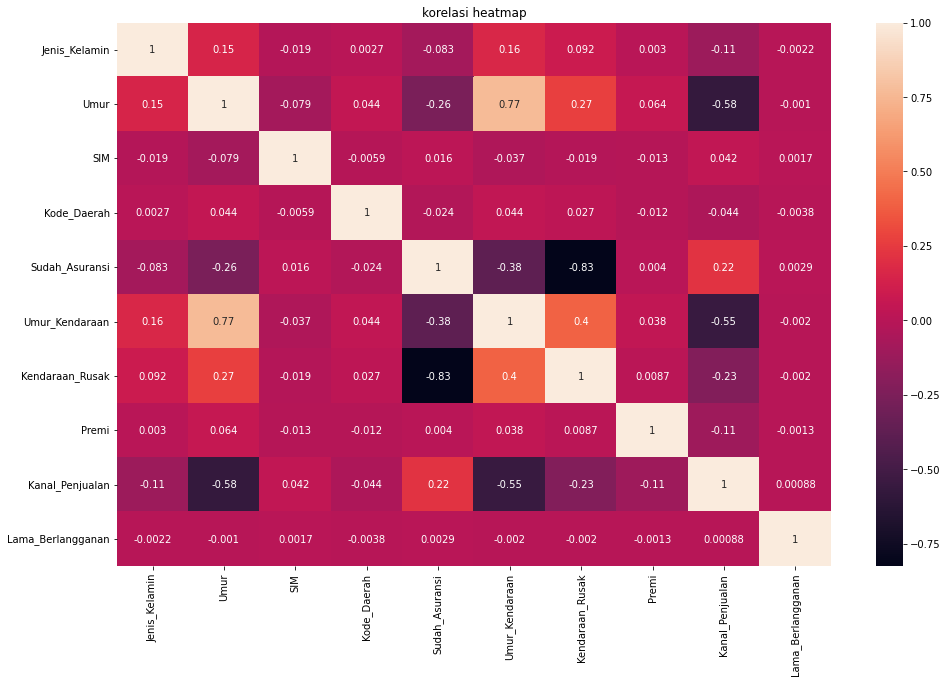

In [ ]:
# mengecek korelasi dengan menggunakan heatmapp pada data train eksperimen
corr = dfTrain_exp.corr()
print(corr)
plt.figure(figsize=(16, 10))
sns.heatmap(dfTrain_exp.corr(), annot = True)
plt.title("korelasi heatmap",y=1.1)
plt.show()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
m = pca.fit_transform(dfTrain_exp)
m

array([[-2.10360867,  0.32783828],
       [ 3.07554604,  0.30497904],
       [ 0.62141329,  0.14552425],
       ...,
       [-2.1947372 ,  0.4813711 ],
       [ 0.33540829,  1.96398687],
       [ 2.12461299, -0.0275551 ]])

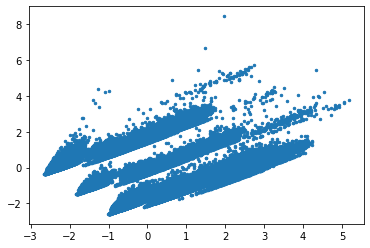

In [ ]:
plt.scatter(m[:,0],m[:,1], s=6)

In [ ]:
# mengitung jarak menggunakan rumus euclidean distance
def euclidean_distance(m1,m2):
    return (sum((m1 - m2)**2)**0.5)

In [ ]:
# mengelompokkan data ke dalam cluster
def clustering(centroids, m):
    clusters = []
    for i in range(len(m)):
        jarak = []
        for centroid in centroids:
            jarak.append(euclidean_distance(centroid, m[i]))
        jarak_terpendek = [z for z, val in enumerate(jarak) if val==min(jarak)]
        clusters.append(jarak_terpendek[0])
    return np.array(clusters)

In [ ]:
# membuat centroid baru
def bangun_centroid(clusters, m):
    centroid_new = []
    df_clusters_m = pd.concat([pd.DataFrame(m),pd.DataFrame(clusters, columns=['cluster'])], axis=1)
    for c in set(df_clusters_m['cluster']):
        df_current_cluster = df_clusters_m[df_clusters_m['cluster']==c][df_clusters_m.columns[:-1]]
        ratarata_cluster = df_current_cluster.mean(axis=0)
        centroid_new.append(ratarata_cluster)
    return np.array(centroid_new)

In [ ]:
# mencari varian yang ada pada cluster untuk melihat baik tidaknya clustering
def varians_cluster_train(clusters, m):
    varians_train = []
    df_clusters_m = pd.concat([pd.DataFrame(m),pd.DataFrame(clusters, columns=['cluster'])], axis=1)
    for c in set(df_clusters_m['cluster']):
        df_current_cluster = df_clusters_m[df_clusters_m['cluster'] ==c][df_clusters_m.columns[:-1]]
        ratarata_cluster = df_current_cluster.mean(axis=0)
        mean_repmat = np.matlib.repmat(ratarata_cluster, df_current_cluster.shape[0],1)
        varians_train .append(np.sum(np.sum((df_current_cluster - mean_repmat)**2)))
    return np.array(varians_train)

In [ ]:
def elbow_method(WCSS, k):
    plt.plot(range(1,k+1),WCSS)
    plt.title('Elbow Method')
    plt.xlabel("#Jumlah Cluster#")
    plt.ylabel("WCSS")
    plt.show()

Varians cluster pertama 38021 pada K: 1
Varians saat percobaan clustering Ke- 1 27827
Varians saat percobaan clustering Ke- 2 20469
WCSS Cluster dengan K = 1 : 48296 

Varians cluster pertama 20469 pada K: 2
Varians saat percobaan clustering Ke- 1 19707
Varians saat percobaan clustering Ke- 2 19525
WCSS Cluster dengan K = 2 : 39232 

Varians cluster pertama 19525 pada K: 3
Varians saat percobaan clustering Ke- 1 19440
Varians saat percobaan clustering Ke- 2 19354
WCSS Cluster dengan K = 3 : 38794 

Varians cluster pertama 19354 pada K: 4
Varians saat percobaan clustering Ke- 1 19291
Varians saat percobaan clustering Ke- 2 19249
WCSS Cluster dengan K = 4 : 38540 

Varians cluster pertama 19249 pada K: 5
Varians saat percobaan clustering Ke- 1 19210
Varians saat percobaan clustering Ke- 2 19182
WCSS Cluster dengan K = 5 : 38392 



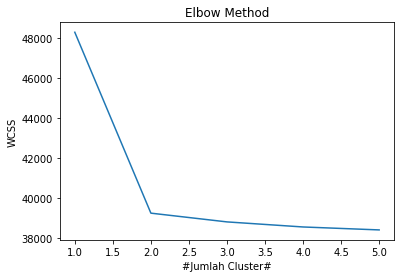

CPU times: user 1min 11s, sys: 199 ms, total: 1min 11s
Wall time: 1min 11s


In [ ]:
# Kmeans dengan k = 5
%%time
k = 5
WCSS = []
centroid_pertama = np.random.choice(len(m), k, replace=False)
centroids = m[centroid_pertama, :]

for i in range (1,k+1):
    variansClusterTrain = []
    clusters = clustering(centroids, m)
    print("Varians cluster pertama", round(np.mean(varians_cluster_train(clusters, m))), "pada K:",i )
    
    for j in range(2):
        centroids = bangun_centroid(clusters,m)
        clusters = clustering(centroids, m)
        cluster_var = np.mean(varians_cluster_train(clusters, m))
        variansClusterTrain.append(cluster_var)
        print("Varians saat percobaan clustering Ke-",j+1, round(cluster_var))
    WCSS.append(np.sum(variansClusterTrain))
    print("WCSS Cluster dengan K =",i,":",round(WCSS[i-1]),"\n")

elbow_method(WCSS,k)

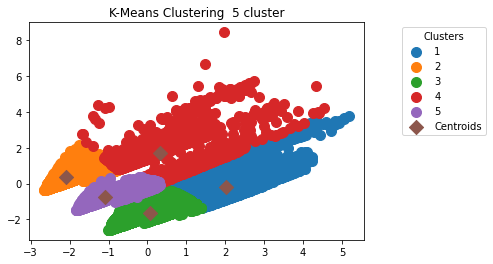

In [ ]:
# Visualisasi K-Means
df_clusters_m = pd.concat([pd.DataFrame(m),pd.DataFrame(clusters, columns=['cluster'])], axis=1)
label = df_clusters_m['cluster']
u_labels = np.unique(label)
for i in range(len(u_labels)):
    plt.scatter(m[label == i , 0] , m[label == i , 1] , label = i+1, s = 100)
plt.scatter(centroids[:,0], centroids[:,1], marker = 'D', s = 100, label = 'Centroids')
plt.title('K-Means Clustering  {} cluster'.format(k))
plt.legend(bbox_to_anchor=(1.1, 1), title = 'Clusters')
plt.show()

In [ ]:
# Evaluasi eksperimen
%%time
from sklearn.metrics import silhouette_score

hasil_silhouette = []

for n_cluster in range(k):
    koef_silhouette = silhouette_score(df_clusters_m, df_clusters_m['cluster'], metric = 'euclidean')
    hasil_silhouette.append(koef_silhouette)
    print('Nilai Silhoutte Method dalam, n_clusters = {} adalah {}'.format(n_cluster+1, koef_silhouette))

Nilai Silhoutte Method dalam, n_clusters = 1 adalah 0.7155706069433537
Nilai Silhoutte Method dalam, n_clusters = 2 adalah 0.7155706069433537
Nilai Silhoutte Method dalam, n_clusters = 3 adalah 0.7155706069433537
Nilai Silhoutte Method dalam, n_clusters = 4 adalah 0.7155706069433537
Nilai Silhoutte Method dalam, n_clusters = 5 adalah 0.7155706069433537
CPU times: user 46min 24s, sys: 2min 12s, total: 48min 37s
Wall time: 41min 24s


Ini merupakan hasil evaluasi eksperimen menggunakan metode silhouette dan memperlihatkan untuk dapat menyelesaikan 5 cluster dibutuhkan waktu total 48 menit 37 detik dengan metode calling standarisasi dan PCA

# **Kesimpulan**

dari dua pengujian yang telah dilakukan, dapat disimpulkan dan dilihat bahwa setiap proses clustering akan berbeda hasilnya tergantung pada saat mengeskplorasi dan metode scaling, serta pemilihan feature seperti apa yang dipilih, dan memperlihatkan perbedaan pada peta persebaran data dilihat dari visualisasinya dan juga dari segi waktu mengclusternyanya juga berbeda. Pada pengujian pertama menggunakan metode MinMaxScaler didapat persebaran data menyebarluas dan setelah di evaluasi dengan silhouette membutuhkan waktu 40 menit untuk mengcluster = 4, sedangkan pada pengujian eksperimen menggunakan metode standarisasi dan pca dalam pemilihan feature dan setelah dievaluasi menggunakan silhoutte membutuhkan waktu 48 menit 37 detikuntuk menyelesaikan cluster = 5. Dan metode untuk mencari K terbaik dapat menggunakan metode silhouette dan juga elbow method